# Feature Selection

Feature selection is the process of selecting a subset of the original features or variables that are most relevant to the prediction or analysis task at hand. There are several benefits of feature selection, including:

- Improved accuracy: Removing irrelevant or redundant features can improve the accuracy of machine learning models and reduce the risk of overfitting.

- Reduced computational complexity: By selecting a smaller set of features, the computational complexity of the model is reduced, which leads to faster training and prediction times.

- Improved interpretability: Feature selection can help simplify the model by focusing on the most important features, which can make it easier to interpret and understand the underlying relationships.

- Better generalization: Selecting a smaller set of features can improve the generalization ability of the model by reducing the likelihood of overfitting to noise or outliers in the data.

- Lower costs: By reducing the number of features, the cost of data storage, processing, and analysis can be reduced, which can be beneficial in applications where resources are limited.

### Correlation 

Correlation is a statistical measure that indicates the degree of association between two variables. In the context of feature selection, correlation is used to identify the degree of linear relationship between features and the target variable. Features that have a high correlation with the target variable are considered important and may be selected for use in a machine learning model.

In feature selection, we can use correlation measures to identify highly correlated features and remove redundant features that provide similar information to the model. This can help to improve the accuracy and interpretability of the model, as well as reduce the risk of overfitting.

In [1]:
import pandas as pd
df = pd.read_csv('train.csv')

<Axes: title={'center': 'Feature-correlation (spearman)'}>

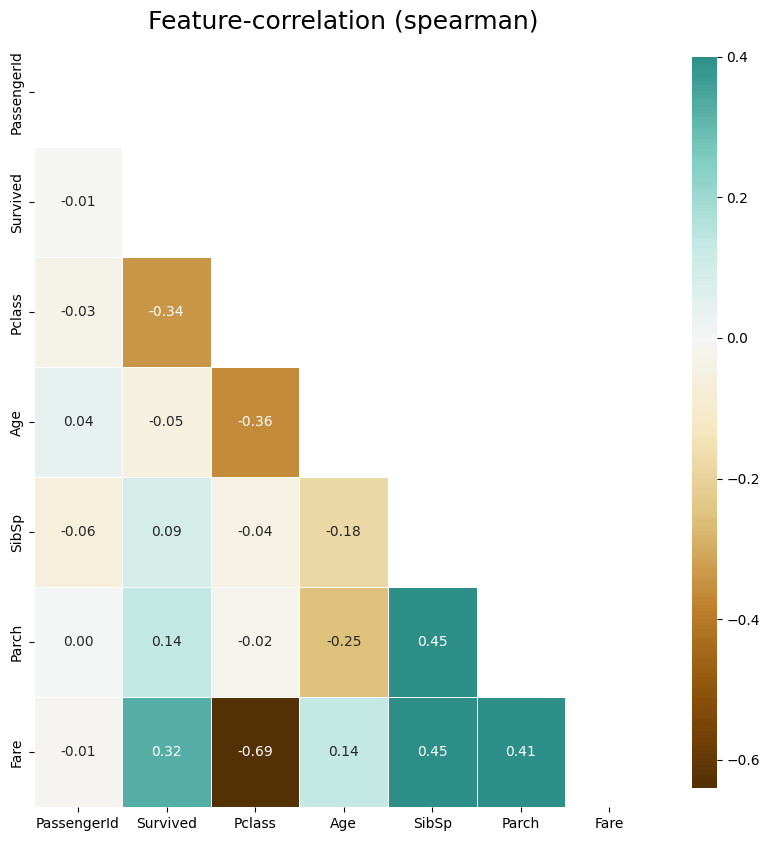

In [2]:
import klib as kb
kb.corr_plot(df,figsize=(10,10),method='spearman')

In example this correlation plot shows that P-class and Fare are important to predict the survival of a passenger.

# Supvised Feature Selection

Supervised feature selection methods use the target variable or the output variable to select the most relevant features for the given task. These methods are typically used in supervised learning problems such as classification or regression. Examples of supervised feature selection methods include Recursive Feature Elimination (RFE), SelectKBest, and Lasso regression.

### Filter Method 

Filter methods are unsupervised feature selection methods that select features based on statistical measures, such as correlation or mutual information, without considering the target variable. These methods are simple, fast, and can be used as a pre-processing step before applying supervised methods. Examples of filter methods include ```chi-squared test``` and ```correlation-based feature selection```.

In [3]:
# Chi-squared test for feature selection
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2

iris = load_iris()
X, y = iris.data, iris.target
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)

pd.DataFrame(X_new).head()

,0,1
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


**Here we used ```SelectKBest``` to select the top 5 features using ```Chi-squared``` as a metric/filter to decide best features**

### Wrapper Method

Wrapper methods are supervised feature selection methods that select features by evaluating the performance of a machine learning algorithm on subsets of features. These methods can be computationally expensive but can potentially find the optimal subset of features for the given task. Examples of wrapper methods include ```recursive feature elimination``` and ```forward selection```.

In [4]:
# Recursive Feature Elimination
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

X, y = make_friedman1(n_samples=50, n_features=10, random_state=0)
estimator = LinearRegression()
selector = RFE(estimator,n_features_to_select=5, step=1)
selector = selector.fit(X, y)
X_new = selector.transform(X)
pd.DataFrame(X_new).head()

,0,1,2,3,4
0,0.548814,0.715189,0.602763,0.544883,0.423655
1,0.791725,0.528895,0.568045,0.925597,0.071036
2,0.978618,0.799159,0.461479,0.780529,0.118274
3,0.264556,0.774234,0.456150,0.568434,0.018790
4,0.359508,0.437032,0.697631,0.060225,0.666767


### Embedded Method

Embedded methods are supervised feature selection methods that select features during the training of a machine learning algorithm. These methods can be computationally efficient and can improve the performance of the algorithm by selecting the most relevant features. Examples of embedded methods include ```L1 regularization``` and ```decision tree-based``` feature selection.

In [5]:
# using random forest for feature selection
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier


cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X, y)

# Print feature importances
print("Feature importances:", rfc.feature_importances_)

Feature importances: [0.03484323 0.01522515 0.06799034 0.06046164 0.00795845 0.01159704
 0.06691736 0.10704566 0.00342279 0.00261508 0.0142637  0.00374427
 0.01008506 0.02955283 0.00472157 0.00561183 0.00581969 0.00375975
 0.00354597 0.00594233 0.08284828 0.01748526 0.0808497  0.13935694
 0.01223202 0.01986386 0.03733871 0.13222509 0.00817908 0.00449731]


**Here the model shows us the level f importance of each feature in making the prediction.**

### Hybrid Method

Hybrid methods are feature selection methods that ```combine multiple types``` of feature selection methods, such as a combination of filter and wrapper methods or a combination of unsupervised and supervised methods. These methods can potentially improve the performance of the feature selection process by leveraging the strengths of multiple methods.

In [6]:
# Filter-wrapper method for feature selection
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

X, y = make_classification(n_features=20, random_state=0)
selector = SelectKBest(mutual_info_classif, k=5)
clf = RandomForestClassifier(n_estimators=100, random_state=0)
pipe = make_pipeline(selector, clf)
pipe.fit(X, y)
X_new = selector.transform(X)
pd.DataFrame(X_new)

,0,1,2,3,4
0,-1.214147,1.050045,-2.132641,0.708695,1.021225
1,-1.270350,0.379113,-1.801708,-0.631192,0.622519
2,0.250202,0.055489,0.277136,0.019279,-0.101697
3,0.216543,0.065274,0.229554,-0.298760,0.699136
4,-0.683049,-1.127849,-0.173569,-0.552541,1.021791
...,...,...,...,...,...
95,-0.136509,0.577823,-0.514312,-1.661598,0.772695
96,0.923281,-0.623043,1.516972,-2.245322,2.497200
97,1.709102,0.030155,2.101412,-0.306766,2.014060
98,-0.008118,1.896342,-1.142416,0.657268,0.112738


# Unsuprvised Feature Selection

Unsupervised feature selection methods do not use the target variable or the output variable and rely solely on the input data to select the most relevant features. These methods are typically used in unsupervised learning problems such as clustering or dimensionality reduction.

### Filter Method

In [7]:
# Variance threshold for feature selection
from sklearn.feature_selection import VarianceThreshold

cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
selector = VarianceThreshold(threshold=0.1)
X_new = selector.fit_transform(X)
pd.DataFrame(X_new).head()

,0,1,2,3,4,5,6,7,8,9,10
0,17.99,10.38,122.80,1001.0,0.9053,8.589,153.40,25.38,17.33,184.60,2019.0
1,20.57,17.77,132.90,1326.0,0.7339,3.398,74.08,24.99,23.41,158.80,1956.0
2,19.69,21.25,130.00,1203.0,0.7869,4.585,94.03,23.57,25.53,152.50,1709.0
3,11.42,20.38,77.58,386.1,1.1560,3.445,27.23,14.91,26.50,98.87,567.7
4,20.29,14.34,135.10,1297.0,0.7813,5.438,94.44,22.54,16.67,152.20,1575.0


### Embeded Method

In [8]:
# PCA-based feature selection
from sklearn.decomposition import PCA

iris = load_iris()
X, y = iris.data, iris.target
pca = PCA(n_components=2)
pca.fit(X)
X_new = pca.transform(X)

pd.DataFrame(X_new).head()

,0,1
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


### Dimensionality Reduction

Dimensionality reduction methods are unsupervised feature selection methods that reduce the number of features by projecting the data onto a lower-dimensional space. These methods can be used as a pre-processing step before applying supervised methods or can be used for unsupervised learning tasks such as clustering. Examples of dimensionality reduction methods include ```Principal Component Analysis``` (PCA) and ```Non-negative Matrix Factorization``` (NMF).

In [9]:
# t-SNE for feature selection
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE

digits = load_digits()
X, y = digits.data, digits.target
tsne = TSNE(n_components=2, random_state=0)
X_new = tsne.fit_transform(X)
pd.DataFrame(X_new).head()

,0,1
0,-2.693610,53.205730
1,10.341755,-11.470732
2,-13.799541,-18.647169
3,-36.104820,6.539101
4,41.091991,-7.852573


### Hybrid Method

In [10]:
# Filter-PCA method for feature selection
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2

digits = load_digits()
X, y = digits.data, digits.target
selector = SelectKBest(chi2, k=20)
pca = PCA(n_components=2)
X_new = selector.fit_transform(X, y)
X_new = pca.fit_transform(X_new)
pd.DataFrame(X_new)

,0,1
0,4.536288,-3.323213
1,-3.133776,-3.965056
2,-2.057323,0.892870
3,-8.032438,14.481983
4,20.399834,-3.614001
...,...,...
1792,-12.431466,1.116721
1793,12.085528,-9.945393
1794,5.242649,-5.429455
1795,-5.254269,2.461580
